## 1 Regresión lineal con una variable

El archivo Dataset_Walmart.csv contiene 6,435 registros históricos de ventas de Walmart desde el 5 de febrero de 2010 hasta el 1 de noviembre de 2012. Este dataset incluye columnas como el número de la tienda, la semana de ventas, las ventas semanales, una bandera que indica si la semana es festiva, la temperatura, el costo del combustible, el índice de precios al consumidor y la tasa de desempleo. Con esta información, se puede analizar cómo diferentes factores afectan las ventas semanales y realizar modelos predictivos basados en estos datos.

# Ejercicio de programación Regresión Lineal

Este código importa varias librerías y módulos clave para el análisis de datos y la visualización en Python. La librería os facilita la gestión de directorios y rutas de archivos, mientras que numpy es esencial para realizar cálculos numéricos avanzados y manejar arrays. matplotlib.pyplot se utiliza para crear gráficos estáticos, como gráficos de líneas y dispersión, mientras que mpl_toolkits.mplot3d.Axes3D permite generar gráficos tridimensionales. Finalmente, %matplotlib inline es un comando específico de Jupyter Notebook que integra las gráficas directamente en el cuaderno, permitiendo una visualización inmediata y cómoda de los resultados gráficos generados.








In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Este código utiliza la librería pandas para cargar un archivo CSV (Dataset_Walmart.csv) en un DataFrame, y luego selecciona dos columnas específicas mediante la función .iloc para extraer la quinta y séptima columna, almacenándolas en las variables X y y, respectivamente. Posteriormente, calcula el número total de elementos en y, que representa la cantidad de ejemplos de entrenamiento (m). Este proceso es común en tareas de aprendizaje automático, donde se preparan las características (X) y los valores objetivo (y) para el modelado.

In [68]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/IA/Laboratorios/Laboratorio_1/Dataset_Walmart.csv')

# Usa iloc para seleccionar columnas por posición entera
X = data.iloc[:, 5]  # Selecciona la 5ta columna (índice 4)
y = data.iloc[:, 7]  # Selecciona la 6ta columna (índice 5)

m = y.size  # m = número de ejemplos de entrenamiento


In [69]:
print(X)

0       2.572
1       2.548
2       2.514
3       2.561
4       2.625
        ...  
6430    3.997
6431    3.985
6432    4.000
6433    3.969
6434    3.882
Name: Fuel_Price, Length: 6435, dtype: float64


In [70]:
print(y)

0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
6430    8.684
6431    8.667
6432    8.667
6433    8.667
6434    8.667
Name: Unemployment, Length: 6435, dtype: float64


In [71]:
print(X.size)

6435


### 1.1 Trazar los datos

La función plotData(x, y) crea una gráfica de dispersión para visualizar la relación entre la población de una ciudad y el beneficio obtenido, utilizando los datos proporcionados en los vectores x y y. La gráfica se genera en una nueva figura, donde cada punto rojo representa un par de valores (población, beneficio), con el tamaño del marcador definido para mejor visibilidad. El eje x se etiqueta como "Población de una ciudad en 10,000s" y el eje y como "Beneficio en $10,000", lo que indica que los datos representan la población escalada en unidades de 10,000 y los beneficios en unidades de $10,000. Esta visualización es útil en análisis como la predicción de beneficios en función de la población de una ciudad, típico en modelos de regresión lineal.

In [72]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


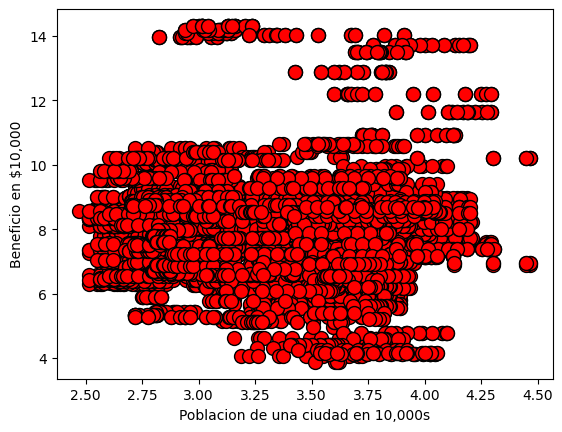

In [73]:
plotData(X, y)

Al ejecutar plotData(X, y), se genera una gráfica de dispersión que ilustra la relación entre la población de diferentes ciudades (X) y los beneficios obtenidos (y). La gráfica muestra puntos rojos, donde cada punto representa un par (población, beneficio). El eje x, etiquetado como "Población de una ciudad en 10,000s", muestra la población escalada, mientras que el eje y, etiquetado como "Beneficio en $10,000", indica el beneficio escalado. Esta visualización permite identificar patrones en los datos, como una posible correlación entre la población de una ciudad y el beneficio, lo que es fundamental para análisis predictivos y modelos de regresión.

In [74]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [75]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [76]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [77]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 33.75
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 4.84
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [78]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [85]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 1000
alpha = 0.005

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 1.2659, 1.9685
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

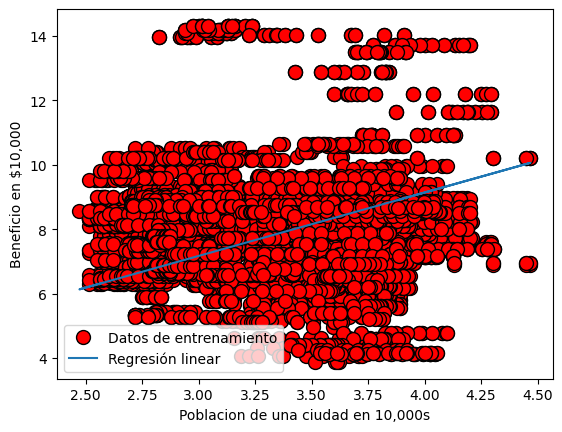

In [86]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [81]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 81664.89

Para una población de = 70,000, se predice un beneficio de 197001.65



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

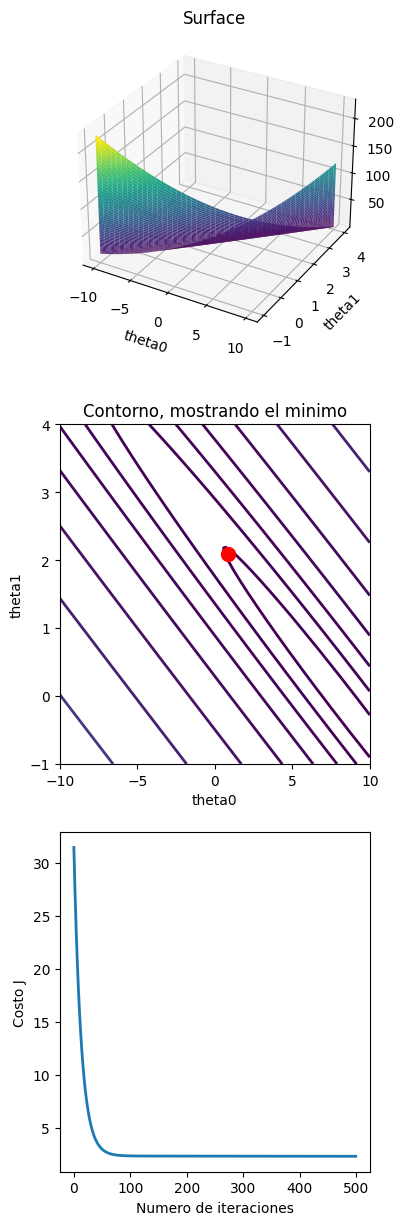

In [82]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass